In [3]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 2.2 MB/s 


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import category_encoders as ce


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


MATRIZ 20x3

In [83]:
# CREO UN VECTOR DE DISTRIBUCION NORMAL 20
da = np.random.normal(loc=0, scale=1, size=100).reshape(100,1)
da2 = np.random.normal(loc=1, scale=2, size=100).reshape(100,1)
da = np.append(da, da2 , axis=0)
da
# CREO UN VECTOR DE DISTRIBUCION UNIFORME
rd = np.random.uniform(low=1, high=2, size=100).reshape(100,1)
rd2 = np.random.uniform(low=2, high=3, size=100).reshape(100,1)
rd = np.append(rd, rd2 , axis=0)
# CREO UN VECTOR DE DISTRIBUCION SESGADA
rs =np.random.lognormal(6,7,100).reshape(100,1)
rs2 =np.random.lognormal(8,8,100).reshape(100,1)
rs = np.append(rs, rs2 , axis=0)

In [87]:
# INCORPORO LOS DATOS A UNA MATRIZ
# https://www.delftstack.com/es/howto/numpy/numpy-add-column/#:~:text=append()-,La%20funci%C3%B3n%20numpy.,valores%20a%20el%20array%20preexistente.
XU = np.append(da, rd , axis=1)
print("XU: ",XU.shape)
# VEO LA MATRIZ
#print("VECTOR NORMAL", da)
#print("VECTOR UNIFORME",rd)
#print("MATRIZ_1", XU)
# INCORPORP LA TERCERA COLUMNA A LA MATRIZ
XU_s = np.append(XU, rs , axis=1)
#print("MATRIZ_2", XU)
print("XU_s: ",XU_s.shape)

print("DISTRIBUCION NORMAL \nMEDIA: ", XU_s.mean(), " // VARIANZA :", XU_s.var()  )

XU:  (200, 2)
XU_s:  (200, 3)
DISTRIBUCION NORMAL 
MEDIA:  25244359976.520836  // VARIANZA : 3.781983671497885e+23


## DEFINO EL VECTOR Y

In [88]:
# XU_s_t = XU_s.transpose()
# XU_s_t.shape
# y_test_t = pd.DataFrame(XU_s_t)
# y_test_DNORMAL = pd.DataFrame(XU_s ,columns=[0])
# print(XU_x)
print(XU_s)

[[ 4.12473852e-01  1.54884310e+00  6.56686000e+04]
 [-1.30539569e+00  1.68943309e+00  1.54729700e+04]
 [-7.64484096e-02  1.33482443e+00  5.27120372e+05]
 [-8.26487612e-01  1.23785222e+00  1.25511439e-03]
 [ 1.85900171e+00  1.58333581e+00  8.48435771e+02]
 [-4.42993893e-01  1.27725663e+00  6.47602328e+01]
 [-1.42430933e-01  1.45328945e+00  7.69904736e+03]
 [ 2.98148057e-01  1.74674217e+00  3.28138826e-02]
 [ 6.82485273e-01  1.94381572e+00  7.15411252e+00]
 [-3.67822044e-01  1.18830819e+00  1.51363749e+04]
 [ 1.33802830e+00  1.63844952e+00  2.44820854e-01]
 [-9.01381963e-02  1.19568974e+00  2.48684637e+00]
 [-6.31141415e-01  1.79382664e+00  1.92986741e+04]
 [ 2.41290364e-01  1.01890069e+00  4.03968274e+08]
 [-7.22728232e-01  1.06053655e+00  2.79579256e+03]
 [-5.73474146e-01  1.99474847e+00  2.28233264e+00]
 [-1.10108050e+00  1.76157353e+00  4.22073123e+05]
 [ 6.29384466e-01  1.63223103e+00  3.54095971e+04]
 [-6.81819658e-01  1.06961657e+00  3.58974774e+05]
 [-6.46001015e-01  1.17360598e+

In [89]:
y_200 =np.array([0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 0,0,0,0,0,0,0,0,0,0,
                 1,1,1,1,1,1,1,1,1,1,
                 1,1,1,1,1,1,1,1,1,1,
                 1,1,1,1,1,1,1,1,1,1,
                 1,1,1,1,1,1,1,1,1,1,
                 1,1,1,1,1,1,1,1,1,1,
                 1,1,1,1,1,1,1,1,1,1,
                 1,1,1,1,1,1,1,1,1,1,
                 1,1,1,1,1,1,1,1,1,1,
                 1,1,1,1,1,1,1,1,1,1,
                 1,1,1,1,1,1,1,1,1,1])


In [90]:
print(da.shape)
print(y_200.shape)

(200, 1)
(200,)


In [91]:
# Asi veremos información estadística básica de nuestro set de datos. La Media, el desvío estándar, 
# valores mínimo y máximo de cada característica:
# VAMOS A CONVERTIR LA MATRIZ DE NP a UN DF 
df = pd.DataFrame(XU_s)
df.describe()

,0,1,2
count,200.000000,200.000000,2.000000e+02
mean,0.442691,1.994005,7.573308e+10
std,1.608566,0.592815,1.066046e+12
min,-5.000699,1.003686,4.701109e-06
25%,-0.631333,1.472106,6.928062e+00
50%,0.253927,2.014153,2.807931e+03
75%,1.415539,2.521799,3.023258e+05
max,5.870008,2.990016,1.507641e+13


Text(0, 0.5, 'Dist. Sesgada')

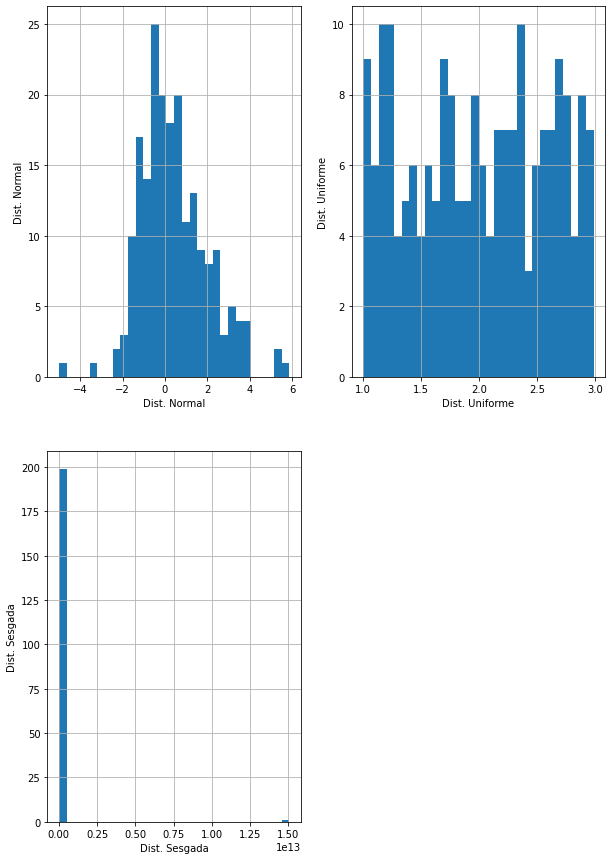

In [92]:
# Dibujamos los histogramas para checkear la distribución de las variables usando el dataframe df20:
plt.figure(figsize = (10,15))

plt.subplot(2,2,1)
fig =df[0].hist(bins=30)
fig.set_xlabel('Dist. Normal')
fig.set_ylabel('Dist. Normal')

plt.subplot(2,2,2)
fig =df[1].hist(bins=30)
fig.set_xlabel('Dist. Uniforme')
fig.set_ylabel('Dist. Uniforme')

plt.subplot(2,2,3)
fig =df[2].hist(bins=30)
fig.set_xlabel('Dist. Sesgada')
fig.set_ylabel('Dist. Sesgada')


# REGRESION LOGISTICA ENTRENAMIENTO SOBRE TODA LA POBLACION

In [93]:
# train a logistic regression model on the training set

from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0) #Model accuracy score: 0.5000 Confusion matrix, al entrenar la poblacion
                                                                                              #[[  0 100]
                                                                                              #[  0 100]]
#logreg = LogisticRegression(solver='newton-cg', random_state=0) #Model accuracy score: 0.9150 Confusion matrix
                                                                                                # [[84  16]
                                                                                                # [ 1 99]]
# logreg = LogisticRegression(solver='sag', random_state=0) #Model accuracy score: 0.5000 Confusion matrix, al entrenar la 
                                                                                              #[[  0 100]
                                                                                              #[  0 100]]
# logreg = LogisticRegression(solver='saga', random_state=0) # Model accuracy score: 0.5000 Confusion matrix
                                                                                          # [[0 100]
                                                                                          # [0 100]]
#logreg = LogisticRegression(solver='lbfgs',random_state=0) # Model accuracy score: 0.5000 Confusion matrix
                                                                                          # [[0 100]
                                                                                          # [0 100]]

# fit the model CON TODA LA POBLACION
logreg.fit(XU_s, y_200)


LogisticRegression(random_state=0, solver='liblinear')

# SPLIT DE DF PARA REGRESION LOGISTICA

In [109]:
# Separo en grupos de entrenamiento y testeo. Asigno un tamaño de 80% para entrenamiento y 20% para 
# testeo:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(XU_s,y_200,test_size=0.2)

In [111]:
# train a logistic regression model on the training set

from sklearn.linear_model import LogisticRegression

# instantiate the model
#logreg = LogisticRegression(solver='liblinear', random_state=0) #Model accuracy score: 0.4250 Confusion matrix, al entrenar la poblacion
                                                                                              # [[ 0 23]
                                                                                              # [ 0 17]]
#logreg = LogisticRegression(solver='newton-cg', random_state=0) #Model accuracy score: 0.4250 Confusion matrix
                                                                                                #  [[ 2 21]
                                                                                                #  [ 2 15]]
# logreg = LogisticRegression(solver='sag', random_state=0) #Model accuracy score: 0.4250 Confusion matrix, al entrenar la 
                                                                                              #[[ 0 23]
                                                                                              # [ 0 17]]
#logreg = LogisticRegression(solver='saga', random_state=0) # Model accuracy score: 0.4250 Confusion matrix
                                                                                          #  [[ 0 23]
                                                                                          #  [ 0 17]]
logreg = LogisticRegression(solver='lbfgs',random_state=0) # Model accuracy score: 0.4250 Confusion matrix
                                                                                          # [[ 0 23]
                                                                                          # [ 0 17]]

# ENTRENO CON LAS MATRICES DE ENTRENAMIENTO ESPLITEADAS
logreg.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [106]:
# GENERO LA PREDICCION CON LAS MATRICES DE TEST QUE SE ESPLITEARON
y_pred_test = logreg.predict(X_test)

y_pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [107]:
# CALCULO LA PRESICION DEL ALGORITMO DE PREDICCION COMPARANDO EL Y DE SALIDA REAL VS LA PREDICCION
from sklearn.metrics import accuracy_score
# EN ESTE CASO VOY A USAR LA MATRIZ DE Y_TEST VS LA MATRIZ DE RESULTADO DE LA PREDICCION = y_pred_test
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.4500


In [76]:
# Creamos nuestra Matriz de Confusión:
# COMPARANDO EL Y DE SALIDA REAL VS LA PREDICCION

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 0 23]
 [ 0 17]]

True Positives(TP) =  0

True Negatives(TN) =  17

False Positives(FP) =  23

False Negatives(FN) =  0


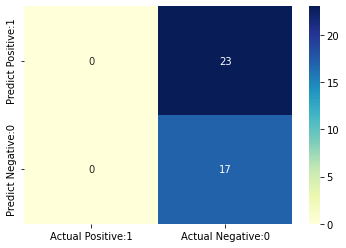

In [78]:
# Visualizamos la Matriz de Confusión:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [82]:
# El Informe de Clasificación es otra forma de evaluar el rendimiento del modelo de clasificación.
# Muestra las puntuaciones de precisión, recuperación, f1 y soporte para el modelo:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.42      1.00      0.60        17

    accuracy                           0.42        40
   macro avg       0.21      0.50      0.30        40
weighted avg       0.18      0.42      0.25        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CONCLUCIONES:
El modelo no logra entrenar bien ya que la distribucion de los datos es baja, por ende el algoritmo de regresion, no puede predecir con excactitud, no por el tipo de ajuste que se le defina sino la distribucion de los datos.